# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 1000

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
df['status_length'] = [len(i) for i in df['STATUS']]

In [4]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11


#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [5]:
df['status_word_count'] = [len(i.split()) for i in df['STATUS']]

In [6]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11,3


### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [7]:
df.sort_values(by='status_word_count').head(-5)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
8178,4bbb1f5843d9d6e8966dce58179f01de,157,2.55,2.65,4.00,2.95,4.05,n,n,y,n,y,07/13/09 01:27 PM,3,1
4170,dba5f5266d03dd6d4db084ad7dbc683c,"wed,.",1.55,2.45,3.50,3.40,4.50,n,n,n,n,y,09/02/09 05:32 AM,5,1
2016,c3f4b3e345cb6b032db2e0459d179db3,HOUSE!,2.45,4.00,3.80,2.80,4.25,n,y,y,n,y,10/13/09 12:00 AM,6,1
956,e6cdef6f475cce3023c5b715f8c9f110,Err:509,1.80,2.90,2.90,3.00,4.20,n,y,n,n,y,10/10/09 07:23 PM,7,1
4177,dba5f5266d03dd6d4db084ad7dbc683c,confused,1.55,2.45,3.50,3.40,4.50,n,n,n,n,y,09/04/09 02:18 AM,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,a6336ec5e11839ae33aee01fa2163652,"~ ""I can no longer tell the days from the nights. The moon glows an eerie red and I could swear it was covered in blood. What have you all done? What have you all become? A people more concerned with the temporary pleasures of this world rather than your salvation? I am now convinced that this is the end. As I raise my head towards the heavens to take one last look at the moon, the stars begin to fall.""",1.35,4.75,2.85,4.55,4.40,n,y,n,y,y,02/04/10 01:34 AM,406,81
9651,06b055f8e2bca96496514891057913c3,"- so, this morning *PROPNAME* gets up to play and he goes over to the carpet where the light was shining through the blinds casting shadows...he then proceeds to tell me the different letters the sun is making on the carpet... 'I', 'T' and 'L' to be exact! He then somehow figured out how to cast his shadow over the sun to make the letters change & disappear! At this rate, he will be smarter than me before he goes to school!",2.85,2.35,3.35,4.70,3.35,n,n,n,y,n,12/05/09 10:12 PM,427,82
6421,c597771fab7477c2ae7b507d532130b0,"CRISIS Next weekend my brother is having a giant sleepover with four of his devil spawn minions. 1) Isnt he a little *old* for that kinda thing? 2) Last time ONE of them came over, I had to listen to Three Days Grace on full blast on my iPod so I could concentrate enough to READ. Yes, you heard me! If anybody who a) isnt a pervert, and b) doesnt hate me could offer a place to stay, I would be grateful...",2.35,2.10,4.15,3.75,4.80,n,n,y,y,y,08/15/09 06:59 PM,412,82
7976,d7e500ad854a1b6ced39e53a525b8a6d,"""I said he's a fairy I do suppose//flyin thru the air in pantyhose//he may be very sexy or even cute//but he looks like a sucka in a blue and red suit//I said you need a man who's got finesse//& his whole name across his chest//he may be able to fly all thru the night//but can he rock a party til the early light//he can't satisfy you with his little worm//but I can bust you out w my Super sperm!!"" Rapper's Delight on Superman",3.25,4.25,2.75,2.00,3.75,n,y,n,n,n,10/21/09 10:39 PM,429,83


In [8]:
df.iloc[6421]['STATUS']

'CRISIS Next weekend my brother is having a \x91giant\x92 sleepover with four of his devil spawn minions. 1) Isn\x92t he a little *old* for that kinda thing? 2) Last time ONE of them came over, I had to listen to Three Days Grace on full blast on my iPod so I could concentrate enough to READ. Yes, you heard me! If anybody who a) isn\x92t a pervert, and b) doesn\x92t hate me could offer a place to stay, I would be grateful...'

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

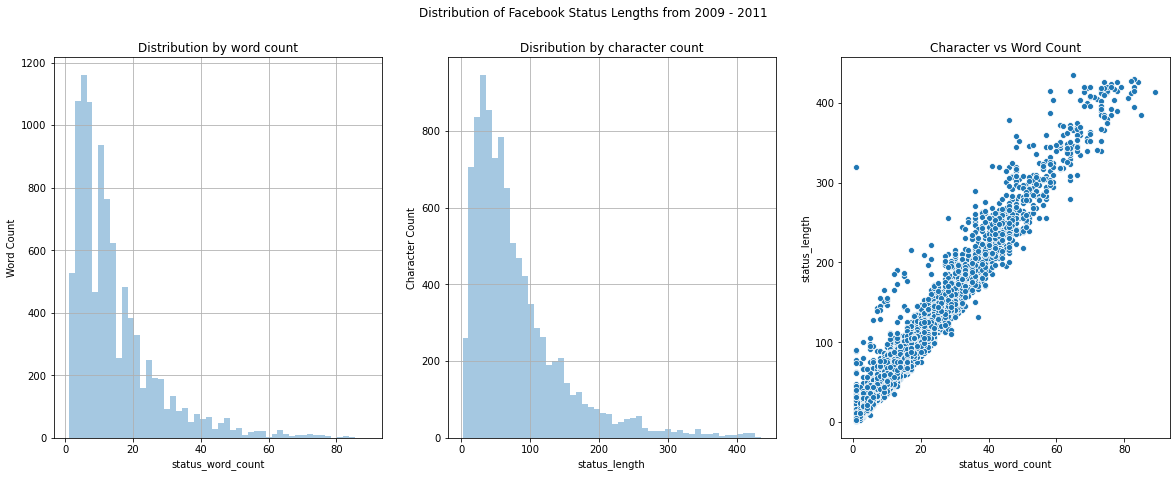

In [9]:
plt.figure(figsize=(20, 7))
plt.suptitle('Distribution of Facebook Status Lengths from 2009 - 2011')
plt.subplot(1, 3, 1)
plt.title('Distribution by word count')
sns.distplot(df['status_word_count'], kde=False)
plt.ylabel('Word Count')
plt.grid()
plt.subplot(1, 3, 2)
plt.title('Disribution by character count')
sns.distplot(df['status_length'], kde=False)
plt.ylabel('Character Count')
plt.grid()
plt.subplot(1, 3, 3)
plt.title('Character vs Word Count')
sns.scatterplot(x=df['status_word_count'], y=df['status_length'])

In [10]:
# Just curious, there is one status with one word but up to 300 characters. I wonder if it was my cringy childhood self. Let's try to find it

In [11]:
df[(df['status_length'] > 300) & (df['status_word_count'] < 10)]['STATUS']

3668    12345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
Name: STATUS, dtype: object

In [12]:
# Apparently one of the status was an extremely long string of numbers and not what i thought it was: a keysmash

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

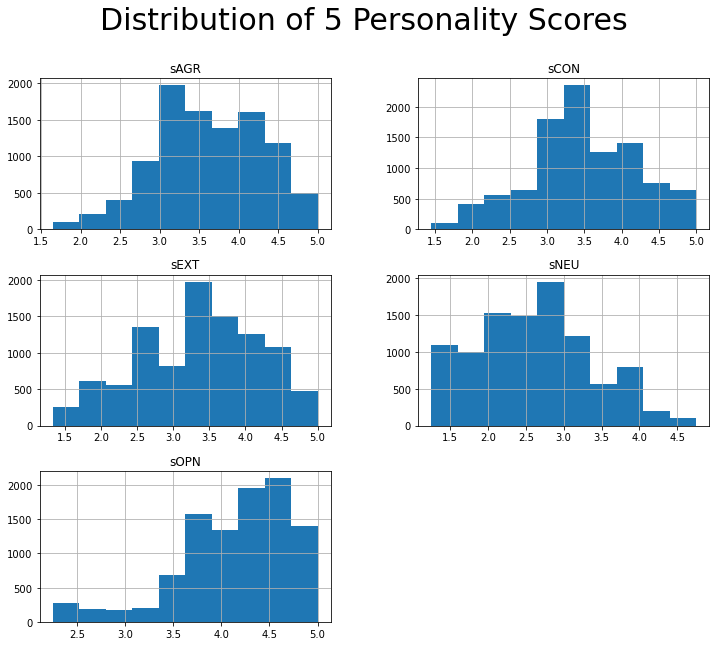

In [13]:
df[['sEXT','sNEU','sAGR','sCON','sOPN']].hist(figsize=(12,10));
plt.suptitle('Distribution of 5 Personality Scores', fontsize=30);

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [14]:
pd.DataFrame(df['#AUTHID'].value_counts())

,#AUTHID
e6cdef6f475cce3023c5b715f8c9f110,223
6f2bebc01062eb8334dccba3e048fdb5,219
527ed53d2ba3a3bc417b8402d5b2f556,194
d7e500ad854a1b6ced39e53a525b8a6d,184
0737e4e4980f56c9fb1cb5743001c917,172
...,...
a764ca41dca158d7a191505dcc8ce47f,1
00419a4c96b32cd63b2c7196da761274,1
5532642937eb3497a43e15dbb23a9d2d,1
a286b7286b1247d4a7851709e9f31e1e,1


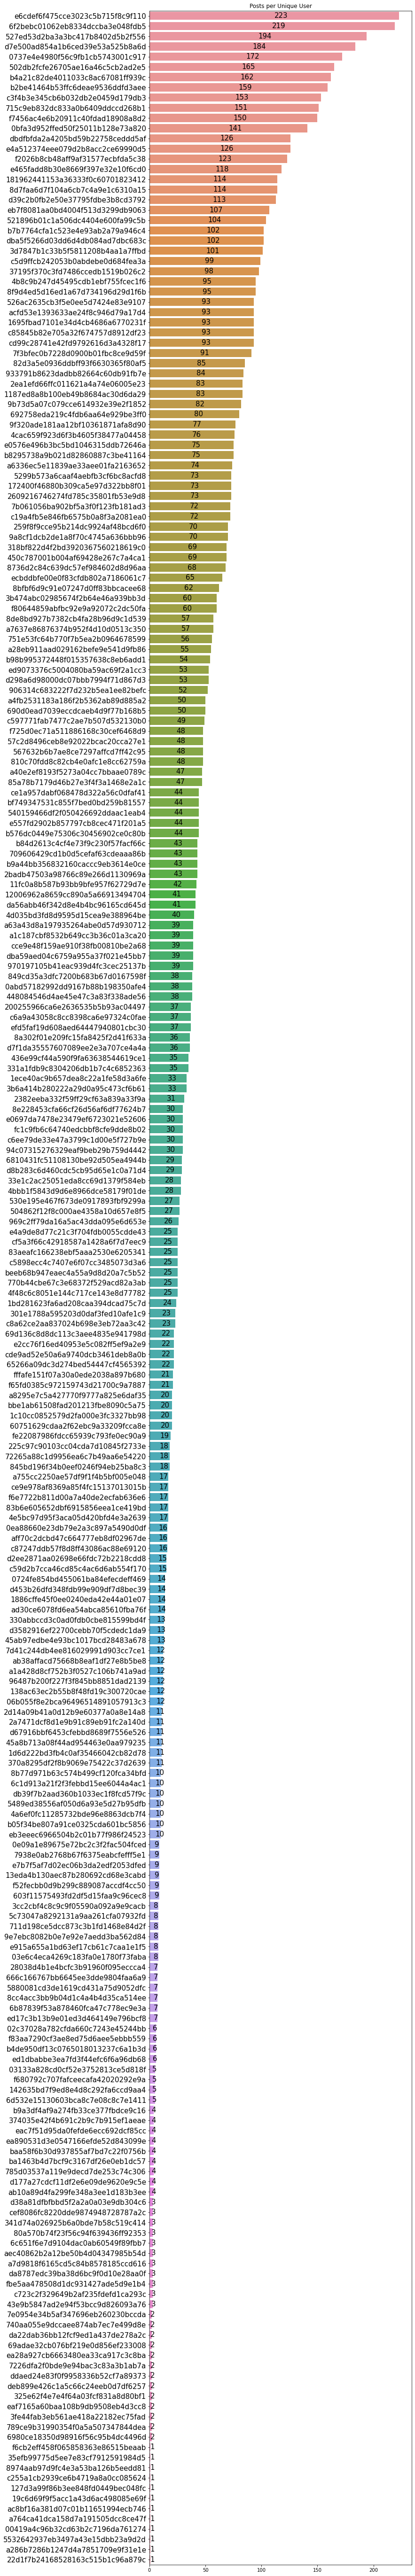

In [15]:
plt.figure(figsize=(10,100))
plt.title('Posts per Unique User')
sns.barplot(data=pd.DataFrame(df['#AUTHID'].value_counts()).T, orient='horizontal');
plt.yticks(range(len(pd.DataFrame(df['#AUTHID'].value_counts()).T.columns)), pd.DataFrame(df['#AUTHID'].value_counts()).T.columns, rotation='horizontal', fontsize=15);
for index, value in enumerate([i for i in pd.DataFrame(df['#AUTHID'].value_counts())['#AUTHID']]):
    plt.text(value/2, index+0.2, str(round(value)), fontsize=15);

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [16]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [17]:
df_unique_users = df[['#AUTHID', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT','cNEU', 'cAGR', 'cCON', 'cOPN']]

In [18]:
df_unique_users = df_unique_users.drop_duplicates()

#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

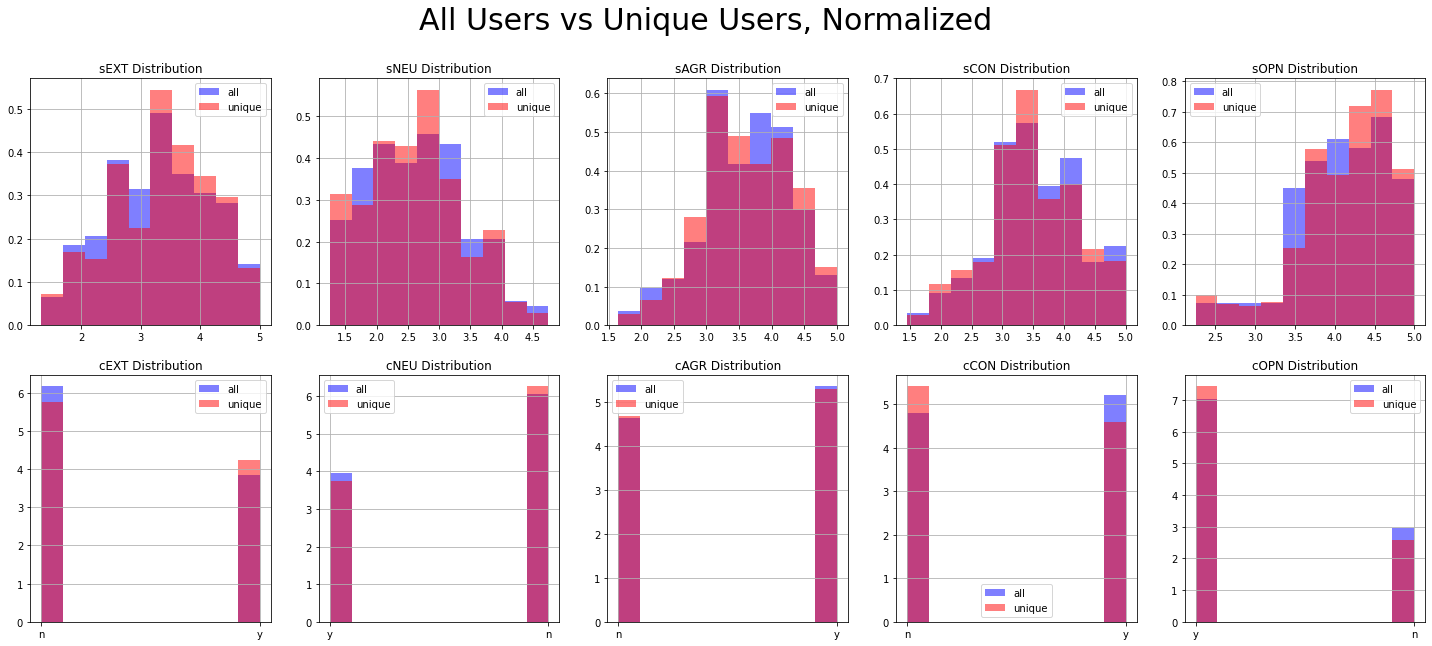

In [19]:
c = 1
plt.figure(figsize=(25,10))
df_unique_users_data = df_unique_users.drop('#AUTHID', axis=1)
df_all = df[['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cAGR','cCON','cOPN']]
plt.suptitle('All Users vs Unique Users, Normalized', fontsize=30)
plt.margins(y=0, tight=True)

# This tight layout was stolen from 
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#plt.tight_layout(rect=[0, 1, 1, 0.95])
for i in df_unique_users_data:
    plt.subplot(2, 5, c)
    colors = {'all': 'red', 'unique': 'blue'}
    labels = list(colors.keys())
    c += 1
    df_unique_users[i].hist(alpha=0.5, color=colors.get('unique'), density=True)
    df_all[i].hist(alpha=0.5, color=colors.get('all'), density=True)
    plt.title(f'{i} Distribution')
    plt.legend(labels)

#### Use the `.describe()` method on `unique_users`:

In [20]:
df_unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,3.292120,2.627240,3.600320,3.522920,4.07856
std,0.861368,0.776835,0.670758,0.740211,0.57506
min,1.330000,1.250000,1.650000,1.450000,2.25000
25%,2.662500,2.000000,3.150000,3.000000,3.75000
50%,3.300000,2.590000,3.660000,3.500000,4.15000
75%,4.000000,3.150000,4.100000,4.050000,4.50000
max,5.000000,4.750000,5.000000,5.000000,5.00000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

In [21]:
# A picture is worth a thousand words and you can immediately do comparion analysis over the same bins and the same criteria, but with different datasets
# Looking at the table summary statistics, it is useful for the quick comparison "A vs B" for a quick slide about numbers, and is ultimately more useful to us as data scientists

# A histogram distribution is useful when you want to immediately compare two sets of data that have similar columns
# I would not recommend to display a table of statistics to anyone but other data scientists or other technical leads because
# I have found that people in general gloss over looking at numbers, but will stare at graphs all day

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

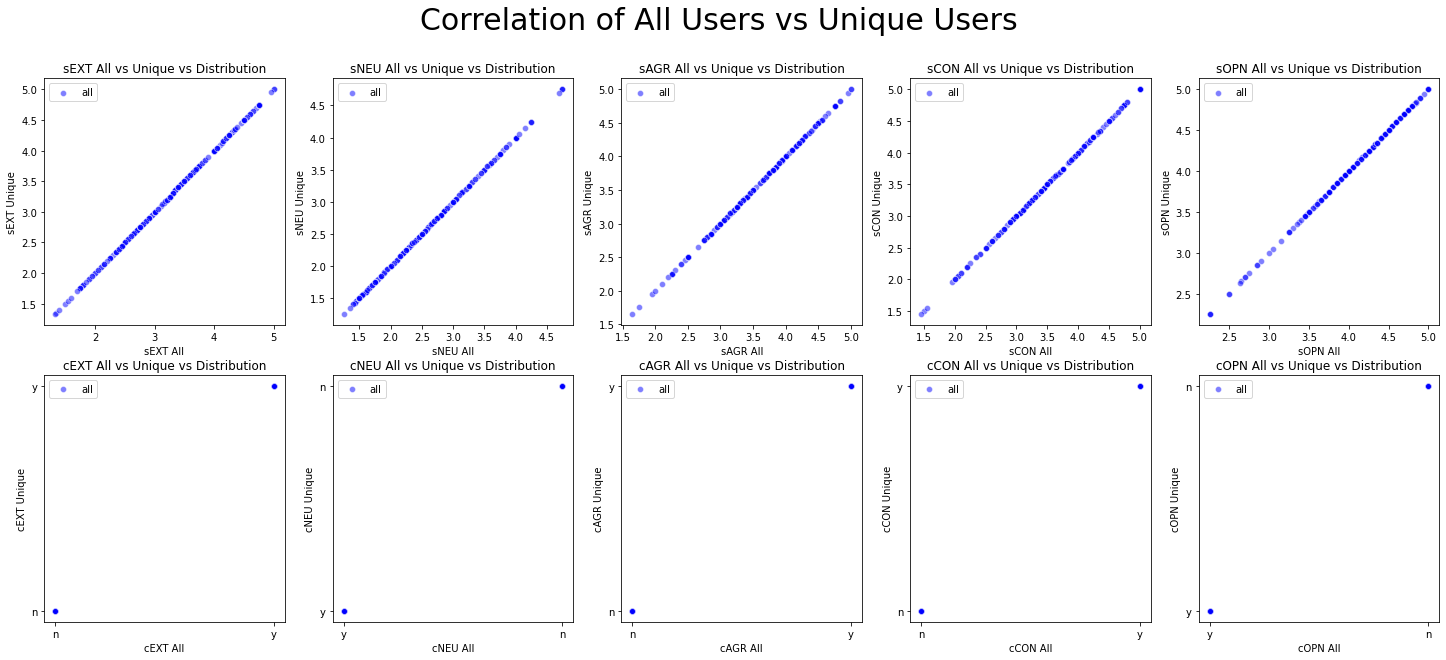

In [22]:
c = 1
plt.figure(figsize=(25,10))
df_unique_users_data = df_unique_users.drop('#AUTHID', axis=1)
df_all = df[['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cAGR','cCON','cOPN']]
plt.suptitle('Correlation of All Users vs Unique Users', fontsize=30)
plt.margins(y=0, tight=True)

# This tight layout was stolen from 
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#plt.tight_layout(rect=[0, 1, 1, 0.95])
for i in df_unique_users_data:
    plt.subplot(2, 5, c)
    colors = {'all': 'red', 'unique': 'blue'}
    labels = list(colors.keys())
    c += 1
    sns.scatterplot(y=df_unique_users[i], x=df_all[i], alpha=0.5, color=colors.get('unique'))
    #sns.scatterplot(data=df_all[i], alpha=0.5, color=colors.get('all'))
    plt.xlabel(f'{i} All')
    plt.ylabel(f'{i} Unique')
    plt.title(f'{i} All vs Unique vs Distribution')
    plt.legend(labels)

In [23]:
# Okay, I hoped I would get some outlier data here, but I don't see anything

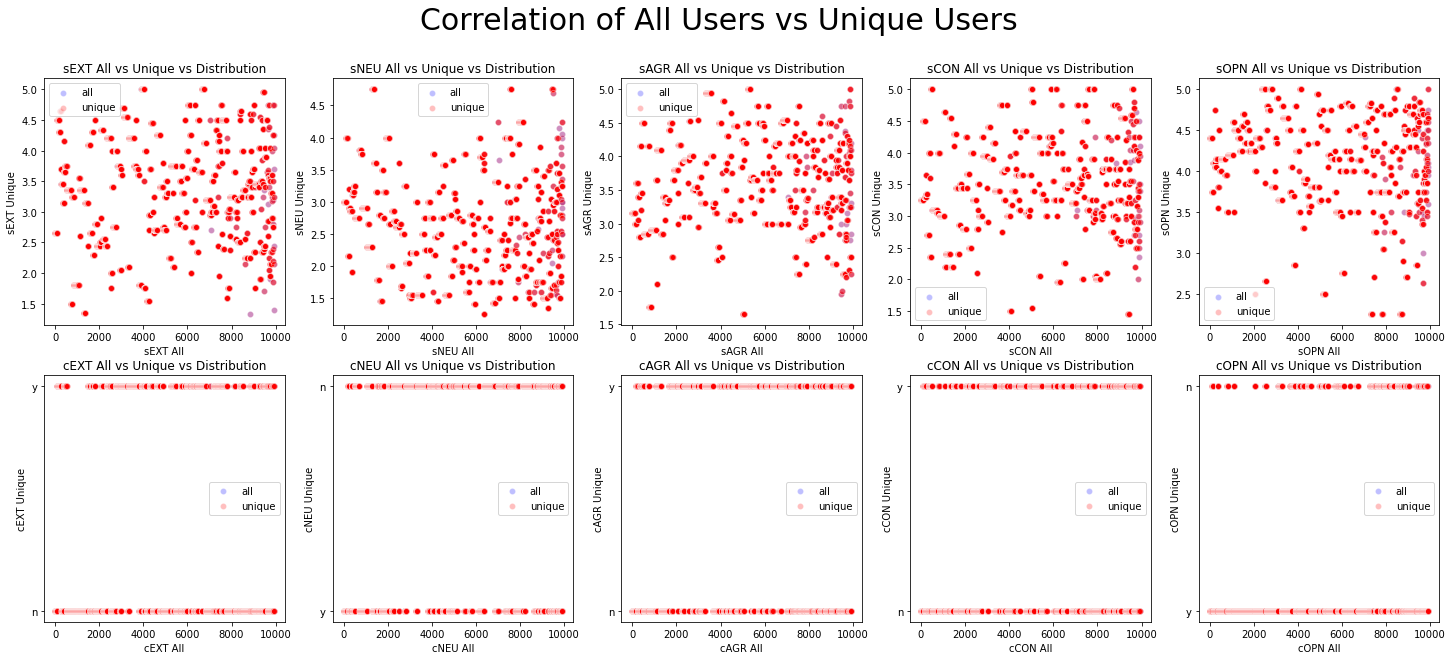

In [24]:
c = 1
plt.figure(figsize=(25,10))
df_unique_users_data = df_unique_users.drop('#AUTHID', axis=1)
df_all = df[['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cAGR','cCON','cOPN']]
plt.suptitle('Correlation of All Users vs Unique Users', fontsize=30)
plt.margins(y=0, tight=True)

# This tight layout was stolen from 
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#plt.tight_layout(rect=[0, 1, 1, 0.95])
for i in df_unique_users_data:
    plt.subplot(2, 5, c)
    colors = {'all': 'red', 'unique': 'blue'}
    labels = list(colors.keys())
    c += 1
    sns.scatterplot(data=df_unique_users[i],alpha=0.25, color=colors.get('unique'), size_norm=True)
    sns.scatterplot(data=df_all[i], alpha=0.25, color=colors.get('all'), size_norm=True)
    plt.xlabel(f'{i} All')
    plt.ylabel(f'{i} Unique')
    plt.title(f'{i} All vs Unique vs Distribution')
    plt.legend(labels)

In [25]:
# Again, I don't see anything when I plot the score vs the position of the status. These look kind of boring so far

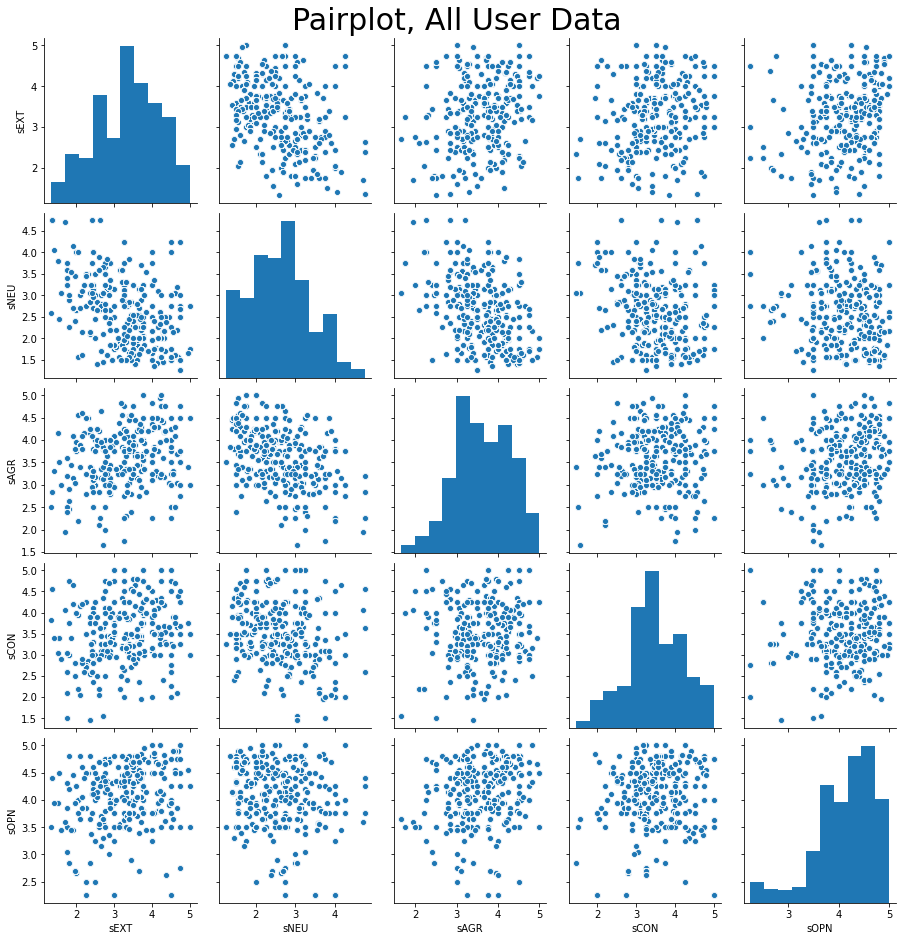

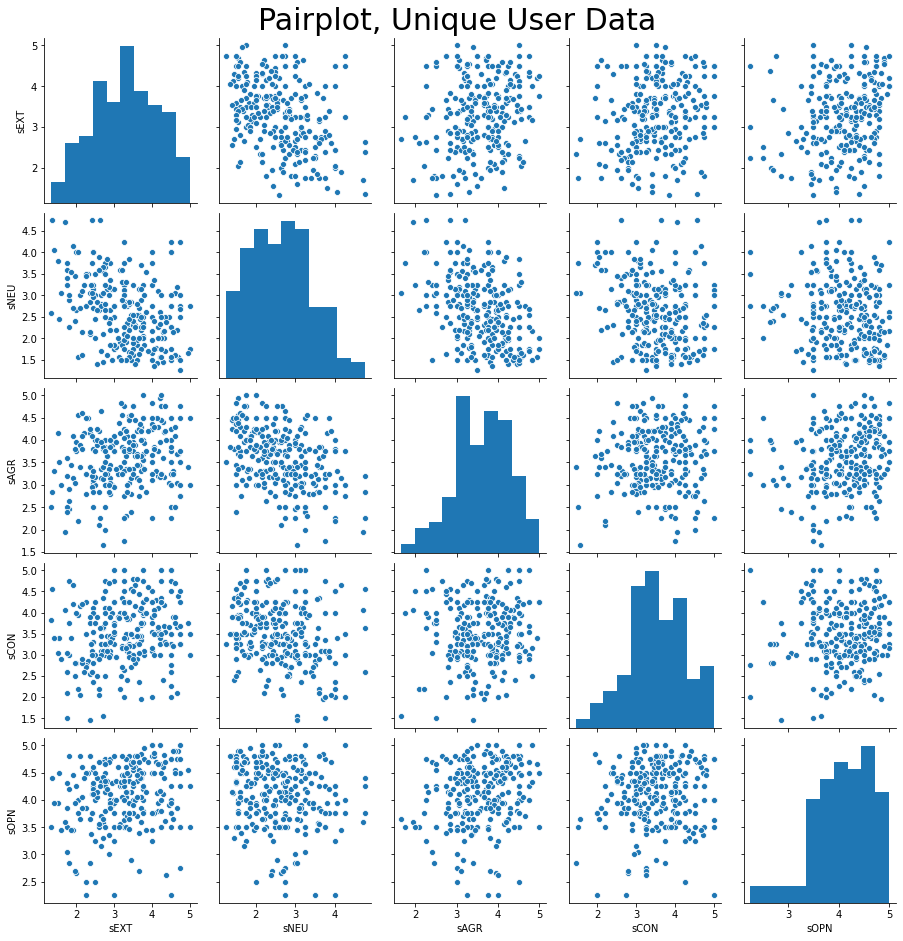

In [26]:
# Add space for the title
# https://stackoverflow.com/a/53898825/14352495

sns.pairplot(df_all);
plt.suptitle('Pairplot, All User Data', y=1.03, fontsize=30);
sns.pairplot(df_unique_users_data);
plt.suptitle('Pairplot, Unique User Data', y=1.03, fontsize=30);

In [27]:
# Doing a pairplot on the personality data , nothing really sticks out

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [28]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [29]:
df.groupby(by='sEXT')[['status_length', 'status_word_count']].mean().iloc[list(range(-5,6))]

,status_length,status_word_count
sEXT,,
4.65,80.629630,14.925926
4.70,162.027397,30.712329
4.75,66.034014,11.666667
4.95,73.733333,13.400000
5.00,70.470320,10.981735
1.33,45.000000,10.000000
1.35,45.540541,8.527027
1.40,21.000000,4.000000
1.50,49.607143,8.696429


In [30]:
df.groupby(by='sNEU')[['status_length', 'status_word_count']].mean().iloc[list(range(-5,6))]

,status_length,status_word_count
sNEU,,
4.05,21.000000,4.000000
4.15,15.000000,3.000000
4.25,154.780105,26.465969
4.70,125.500000,22.500000
4.75,56.115385,10.413462
1.25,55.500000,9.571429
1.35,55.640000,9.920000
1.40,54.784615,9.615385
1.43,106.571429,18.704082


In [31]:
df.groupby(by='sAGR')[['status_length', 'status_word_count']].mean().iloc[list(range(-5,6))]

,status_length,status_word_count
sAGR,,
4.65,62.931034,12.620690
4.75,89.343434,16.868687
4.83,67.783333,11.983333
4.95,66.611872,12.082192
5.00,69.588235,12.798319
1.65,66.863636,12.181818
1.75,31.250000,5.833333
1.95,125.500000,22.500000
2.00,48.333333,8.666667


In [32]:
df.groupby(by='sCON')[['status_length', 'status_word_count']].mean().iloc[list(range(-5,6))]

,status_length,status_word_count
sCON,,
4.65,49.159091,9.318182
4.70,96.000000,17.125000
4.75,67.872881,12.220339
4.80,106.250000,19.678571
5.00,69.943750,12.812500
1.45,111.263158,21.657895
1.50,77.948718,13.589744
1.55,66.863636,12.181818
1.95,79.182692,14.730769


In [33]:
df.groupby(by='sOPN')[['status_length', 'status_word_count']].mean().iloc[list(range(-5,6))]

,status_length,status_word_count
sOPN,,
4.84,79.182692,14.730769
4.85,61.615385,10.692308
4.90,150.564706,28.211765
4.95,77.081081,13.243243
5.00,82.254386,14.318713
2.25,68.151515,12.557576
2.50,116.463636,21.427273
2.63,220.000000,43.000000
2.65,71.780000,12.580000


#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

In [34]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11,3


In [35]:
# I want to plot ALL of them! I'm looking for some sort of insight and so far this dataset was initially promising but is really boring
# https://www.kite.com/python/answers/how-to-split-a-pandas-dataframe-into-multiple-dataframes-by-column-value-in-python

In [36]:
df_cOPN, df_cCON, df_cEXT, df_cAGR, df_cNEU = df[['cOPN', 'status_word_count']], df[['cCON', 'status_word_count']], df[['cEXT', 'status_word_count']], df[['cAGR', 'status_word_count']], df[['cNEU', 'status_word_count']], 

In [37]:
df_cOPN_y, df_cCON_y, df_cEXT_y, df_cAGR_y, df_cNEU_y  = df_cOPN.groupby(by='cOPN').get_group('y'), df_cCON.groupby(by='cCON').get_group('y'), df_cEXT.groupby(by='cEXT').get_group('y'), df_cAGR.groupby(by='cAGR').get_group('y'), df_cNEU.groupby(by='cNEU').get_group('y')

In [38]:
df_cOPN_n, df_cCON_n, df_cEXT_n, df_cAGR_n, df_cNEU_n = df_cOPN.groupby(by='cOPN').get_group('n'), df_cCON.groupby(by='cCON').get_group('n'), df_cEXT.groupby(by='cEXT').get_group('n'), df_cAGR.groupby(by='cAGR').get_group('n'), df_cNEU.groupby(by='cNEU').get_group('n')

In [39]:
df_y = [df_cOPN_y, df_cCON_y, df_cEXT_y, df_cAGR_y, df_cNEU_y]

In [40]:
labels_y = ['df_cOPN_y', 'df_cCON_y', 'df_cEXT_y', 'df_cAGR_y', 'df_cNEU_y']

In [41]:
df_n = [df_cOPN_n, df_cCON_n, df_cEXT_n, df_cAGR_n, df_cNEU_n]

In [42]:
labels_n = ['df_cOPN_n', 'df_cCON_n', 'df_cEXT_n', 'df_cAGR_n', 'df_cNEU_n']

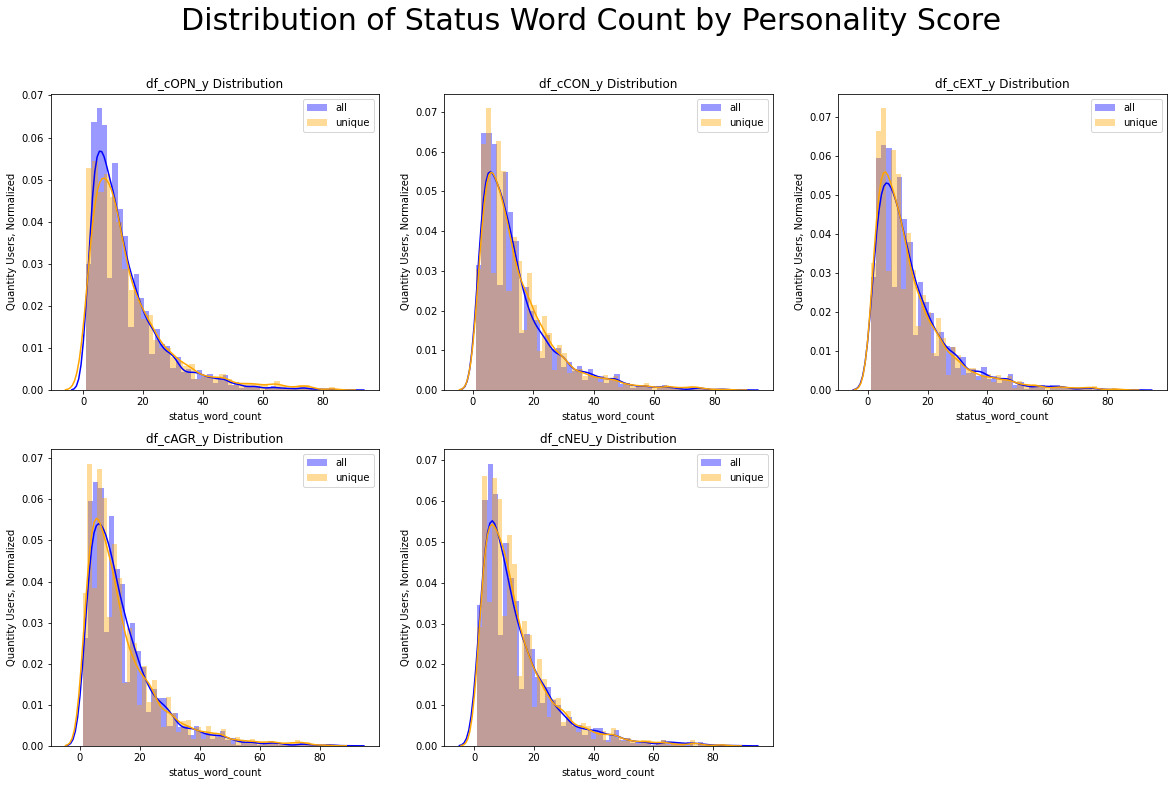

In [43]:
c = 1
plt.figure(figsize=(20,12))
plt.suptitle('Distribution of Status Word Count by Personality Score', fontsize=30)
plt.margins(y=0, tight=True)

# This tight layout was stolen from 
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#plt.tight_layout(rect=[0, 1, 1, 0.95])
for i,j in enumerate(df_y):
    plt.subplot(2, 3, c)
    c += 1
    sns.distplot(j[['status_word_count']], color='blue')
    sns.distplot(df_n[i]['status_word_count'], color='orange')
    plt.title(f'{labels_y[c-2]} Distribution')
    plt.ylabel('Quantity Users, Normalized')
    plt.legend(labels)

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [44]:
cv = CountVectorizer(stop_words='english')

In [45]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11,3


In [46]:
# https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier

In [47]:
matrix = cv.fit_transform(df['STATUS'])

In [48]:
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])  

### Show the 15 most common words

In [49]:
df_words = pd.DataFrame(freqs, columns=['word','count'])

In [50]:
df_words.sort_values(by='count', ascending=False).head(15)

,word,count
10469,propname,1309
7221,just,717
3578,day,534
7714,like,506
13497,time,424
5756,going,414
13543,today,402
8985,new,386
14861,work,369
5768,good,354


### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

In [51]:
df_words.set_index('word').sort_values(by='count', ascending=False).head(15)[['count']].T

word,propname,just,day,like,time,going,today,new,work,good,got,night,love,tomorrow,know
count,1309,717,534,506,424,414,402,386,369,354,314,312,292,277,276


Text(0, 0.5, 'Word Count')

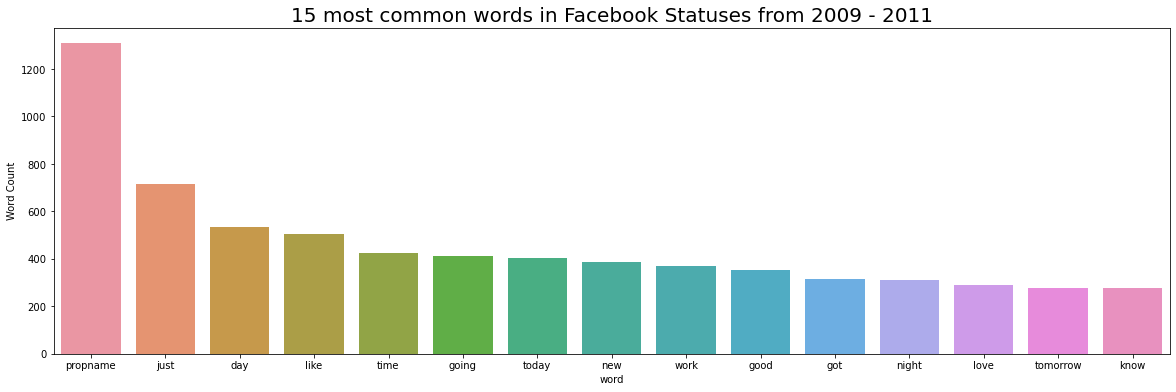

In [52]:
plt.figure(figsize=(20, 6))
plt.title('15 most common words in Facebook Statuses from 2009 - 2011', fontsize=20)
sns.barplot(data=df_words.set_index('word').sort_values(by='count', ascending=False).head(15)[['count']].T)
plt.ylabel('Word Count')

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [53]:
df[['*PROPNAME*' in i.split() for i in df['STATUS']]][['STATUS']].head(10)

,STATUS
6,"saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party."
69,has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.
104,Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles
202,"ATTENTION EVERYONE!!! Vote for the short ""AFTER HOURS"" to support *PROPNAME* - our local Michigan talent and a wonderful person. Repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//"
205,"would love to sleep, but *PROPNAME* writes too damn well!!!"
222,stupid people are stupid and Beverly Hills Police is at it's best as usual... ( *PROPNAME* needs to call me!!!)
245,Nicel little test for *PROPNAME*!! Way to show them *PROPNAME* how to play PRO football!!
298,The best way to describe *PROPNAME* is as an IRL troll.
308,Fuckin' *PROPNAME*
320,"""Necessity is the plea for every infringement of human freedom. It is the argument of tyrants; it is the creed of slaves."" - *PROPNAME*"


#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

In [54]:
# I feel that Propname is a legal or identifier name that could be used to track personal information

# checking the included PDF:
'''
For instance each proper name of person has been replaced with a fixed string (*PROPNAME*). 
Famous names, such as “Chopin” and “Mozart”, and locations, such as “New York” and “Mexico”, 
have not been replaced.
''';

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [55]:
test = pd.DataFrame(cv.transform(['likes the sound of thunder.']).toarray(), columns=cv.get_feature_names())

In [56]:
test.T[test.T == 1].dropna()

,0
likes,1.0
sound,1.0
thunder,1.0


In [57]:
# YAY IT WORKS

In [58]:
cv_text = pd.DataFrame(cv.transform(df['STATUS']).toarray(), columns=cv.get_feature_names())

In [59]:
scores = df[['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cAGR','cCON','cOPN']]

In [60]:
cv_text

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
scores

,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
1,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
2,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
4,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9911,2.15,2.15,4.10,2.90,4.60,n,n,y,n,y
9912,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y
9913,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y
9914,1.40,4.05,3.30,3.40,3.95,n,y,n,n,y


In [62]:
text_and_scores = pd.concat([scores, cv_text], axis=1)

In [63]:
text_and_scores

,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0
1,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0
2,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0
3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0
4,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,2.15,2.15,4.10,2.90,4.60,n,n,y,n,y,...,0,0,0,0,0,0,0,0,0,0
9912,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y,...,0,0,0,0,0,0,0,0,0,0
9913,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y,...,0,0,0,0,0,0,0,0,0,0
9914,1.40,4.05,3.30,3.40,3.95,n,y,n,n,y,...,0,0,0,0,0,0,0,0,0,0


#### Show the 25 most common words for statuses from high-cAGR users:

In [102]:
top_25 = pd.DataFrame(text_and_scores[text_and_scores['cAGR'] == 'y'].drop(['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cCON','cOPN', 'cAGR'], axis=1).sum(), columns=['count_high_agr']).sort_values(by='count_high_agr', ascending=False).head(25)

In [ ]:
# That single line of code is MASSIVE

#### Show the 25 most common words for statuses from low-cAGR users:

In [103]:
bot_25 = pd.DataFrame(text_and_scores[text_and_scores['cAGR'] == 'n'].drop(['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cCON','cOPN', 'cAGR'], axis=1).sum(), columns=['count_low_agr']).sort_values(by='count_low_agr', ascending=False).head(25)

In [104]:
pd.concat([top_25, bot_25], axis=1)

,count_high_agr,count_low_agr
propname,699.0,610.0
just,402.0,315.0
day,297.0,237.0
like,280.0,226.0
time,221.0,203.0
today,219.0,183.0
work,206.0,163.0
good,201.0,153.0
going,200.0,214.0
new,194.0,192.0


### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

In [108]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
matrix = cv.fit_transform(df['STATUS'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])  
df_bigrams = pd.DataFrame(freqs, columns=['word','count'])

In [114]:
df_bigrams.sort_values(by='count', ascending=False).head(10)

,word,count
37501,propname propname,147
24503,just got,55
32413,new year,53
22702,http www,46
30116,merry christmas,44
28081,looking forward,43
15583,feel like,39
20638,happy new,32
12513,don know,31
4710,birthday wishes,29


### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

In [109]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))
matrix = cv.fit_transform(df['STATUS'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])  
df_trigrams = pd.DataFrame(freqs, columns=['word','count'])

In [115]:
df_trigrams.sort_values(by='count', ascending=False).head(10)

,word,count
35879,propname propname propname,54
16544,gainesville film industry,23
51596,www examiner com,23
21475,http www examiner,23
475,24676 gainesville film,23
14914,film industry examiner,23
19502,happy new year,21
13382,examiner com examiner,20
7687,com examiner 24676,20
13380,examiner 24676 gainesville,20


---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

In [117]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11,3


In [134]:
wc_cAGR_y_raw = pd.DataFrame(text_and_scores[text_and_scores['cAGR'] == 'y'].drop(['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cCON','cOPN', 'cAGR'], axis=1).sum(), columns=['count_high_agr']).sort_values(by='count_high_agr', ascending=False)

In [135]:
wc_cAGR_n_raw = pd.DataFrame(text_and_scores[text_and_scores['cAGR'] == 'n'].drop(['sEXT','sNEU','sAGR','sCON','sOPN','cEXT','cNEU','cCON','cOPN', 'cAGR'], axis=1).sum(), columns=['count_low_agr']).sort_values(by='count_low_agr', ascending=False).head(25)

In [136]:
wc_cAGR_y = wc_cAGR_y[wc_cAGR_y > 0].dropna()

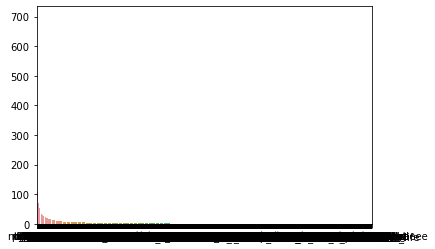

In [141]:
sns.barplot(data=wc_cAGR_y.T.head(10));

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.